In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [96]:
x, y = make_blobs(n_features=5, n_samples=2500, centers=4,random_state=42)

In [97]:
x.shape

(2500, 5)

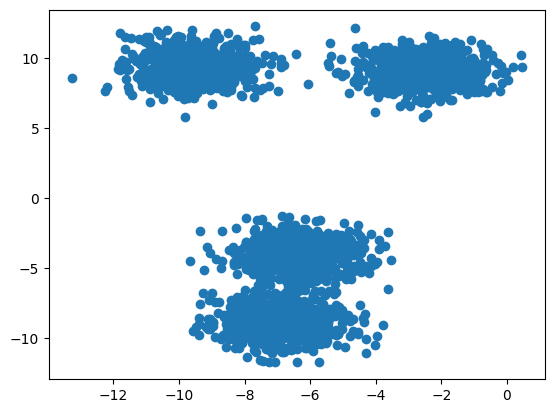

In [98]:
plt.scatter(x[:,0],x[:,1])

In [99]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [160]:
# let's find the  value of k using manual method (elbow method)
wcss = []
for k in range(1,12):
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [161]:
wcss

[197036.9359475306,
 67111.54907164865,
 34000.25754224109,
 8786.410015042573,
 8479.11803447681,
 8109.536074824516,
 7879.154053387451,
 7731.488874491938,
 7260.595955736507,
 7047.355665702236,
 6908.859193448855]

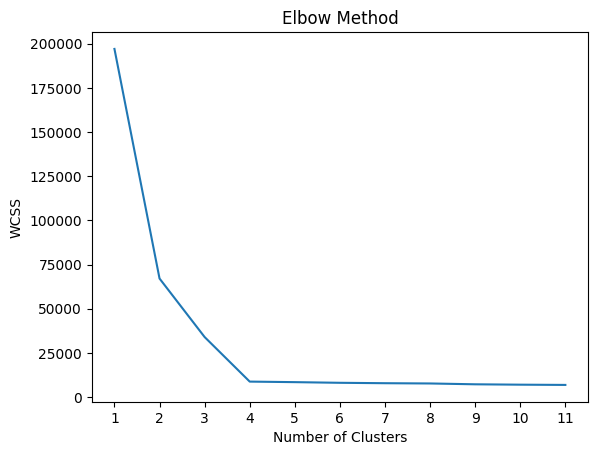

In [197]:
plt.plot(range(1,12), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.xticks(range(1, 12))
plt.ylabel("WCSS")
plt.show()

In [198]:
# best value for k will be 4
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
y_train_labels = kmeans.fit_predict(x_train) ## or kmeans.labels_
print(y_train_labels)

[1 1 3 ... 0 1 0]


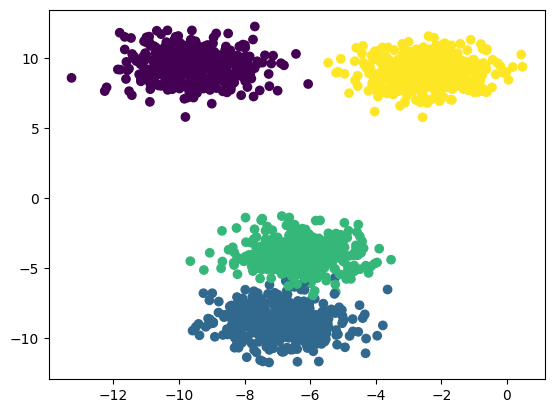

In [199]:
plt.scatter(x_train[:,0], x_train[:,1],c=y_train_labels)

In [200]:
y_test_labels = kmeans.predict(x_test)

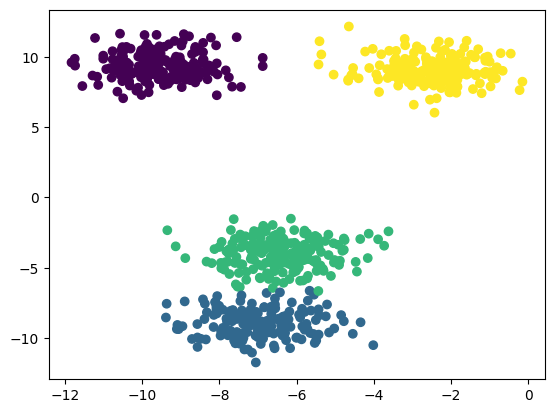

In [201]:
plt.scatter(x=x_test[:,0], y=x_test[:,1], c=y_test_labels)

In [202]:
# for automation of this process we use kneelocator
from kneed import KneeLocator
kl = KneeLocator(range(1,12), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

4


In [208]:
# performance metrics - silhoutte score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,12):
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[0.5999141994415929,
 0.6424948891459583,
 0.7428586246037224,
 0.5945664120141606,
 0.4370261539278977,
 0.28804220667121927,
 0.2842589020464998,
 0.1390233443704554,
 0.4286598389451471,
 0.13434956747840401]

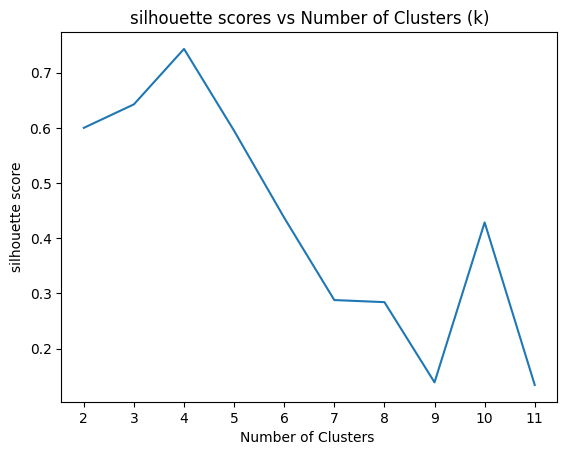

In [209]:
plt.plot(range(2,12), silhouette_scores)
plt.title("silhouette scores vs Number of Clusters (k)")
plt.xlabel("Number of Clusters ")
plt.ylabel("silhouette score")
plt.xticks(range(2, 12))
plt.show()

In [214]:
final_score = silhouette_score(x_test,y_test_labels)
print("Best silhouette score: ",final_score)

Best silhouette score:  0.7428568478882953
